# Long term Solar System

In [4]:
import rebound
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from names import *
rebound.__build__

'Dec 15 2023 12:10:19'

Run script:

```
import rebound
import numpy as np
import sys

print(rebound.__build__)


adaptive_mode = int(sys.argv[1])
i = int(sys.argv[2])

times = np.logspace(3,9,1000)
sim = rebound.Simulation()
sim.ri_ias15.adaptive_mode = adaptive_mode
sim.exact_finish_time = 0
rebound.data.add_outer_solar_system(sim)
sim.particles[1].x *= 1+i*1e-15
e0 = sim.energy()
es = np.zeros(len(times))
dts = np.zeros(len(times))
for j in range(len(times)):
    sim.integrate(times[j],exact_finish_time=0)
    e1 = sim.energy()
    dts[j] = sim.dt
    es[j] = abs((e0-e1)/e0)
    np.save("dts_%d_%d.npy"%(adaptive_mode, i),dts)
    np.save("es_%d_%d.npy"%(adaptive_mode, i),es)
```

In [3]:
!scp -o ProxyJump=rein@rein rein@rein005:~/git/rebound/\*.npy newias15_longterm_ss/

dts_1_0.npy                                   100% 8128    80.2KB/s   00:00    
dts_1_1.npy                                   100% 8128   108.8KB/s   00:00    
dts_1_10.npy                                  100% 8128    97.2KB/s   00:00    
dts_1_11.npy                                  100% 8128    88.3KB/s   00:00    
dts_1_2.npy                                   100% 8128   109.0KB/s   00:00    
dts_1_3.npy                                   100% 8128    86.2KB/s   00:00    
dts_1_4.npy                                   100% 8128   106.0KB/s   00:00    
dts_1_5.npy                                   100% 8128   108.9KB/s   00:00    
dts_1_6.npy                                   100% 8128    52.8KB/s   00:00    
dts_1_7.npy                                   100% 8128   102.5KB/s   00:00    
dts_1_8.npy                                   100% 8128    90.9KB/s   00:00    
dts_1_9.npy                                   100% 8128    84.0KB/s   00:00    
dts_2_0.npy                             

In [2]:
Nsamples = np.load("newias15_longterm_ss/es_1_0.npy").shape[0]
es = np.zeros([2,12,Nsamples])
for i in range(12):
    es[0,i] = np.load("newias15_longterm_ss/es_1_%d.npy"%i)
    es[1,i] = np.load("newias15_longterm_ss/es_2_%d.npy"%i)

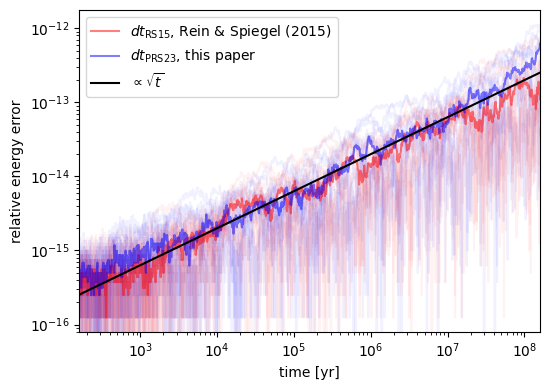

In [7]:
fig, ax = plt.subplots(figsize=(5.6,4))
times = np.logspace(3,9,1000)
years = times/(2.*np.pi)
ax.set_xlabel("time [yr]")
ax.set_ylabel("relative energy error")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([years[0], years[-1]])
for i in range(12):
    ax.plot(years,es[0,i], color="red",alpha=0.05)
    ax.plot(years,es[1,i], color="blue",alpha=0.05)
ax.plot(years,np.median(es[0],axis=0), label=labelold, color="red",alpha=0.5)
ax.plot(years,np.median(es[1],axis=0), label=labelnew, color="blue",alpha=0.5)    
ax.plot(years,2e-17*np.sqrt(years), color="black", label=r"$\propto \sqrt{t}$")    
ax.legend()

fig.tight_layout()
fig.savefig("longterm.png",dpi=500)